In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [2]:
# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
# Añadir anomalías artificialmente a algunas muestras
np.random.seed(42)
anomalies_idx = np.random.choice(len(X), size=10, replace=False)
X[anomalies_idx, :] += np.random.normal(scale=5, size=(10, 4))

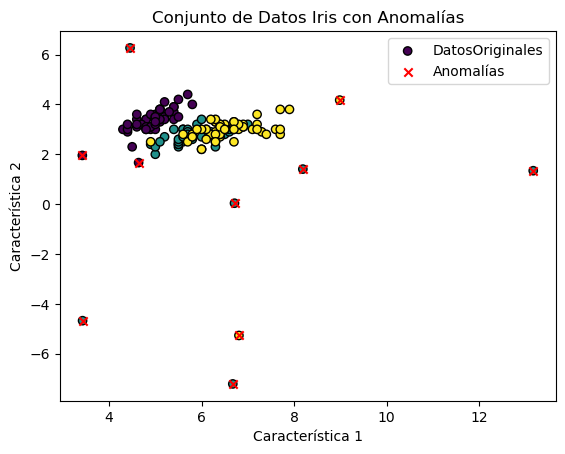

In [4]:
#Visualizacion de Datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', label='DatosOriginales')
plt.scatter(X[anomalies_idx, 0], X[anomalies_idx, 1], c='r', marker='x',
label='Anomalías')
plt.title('Conjunto de Datos Iris con Anomalías')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

In [5]:
#Aplicar Isolation Forest:
isolation_forest_model = IsolationForest(contamination=0.1,
random_state=42)
isolation_forest_model.fit(X)
isolation_forest_preds = isolation_forest_model.predict(X)
anomalies_isolation_forest = X[isolation_forest_preds == -1, :]

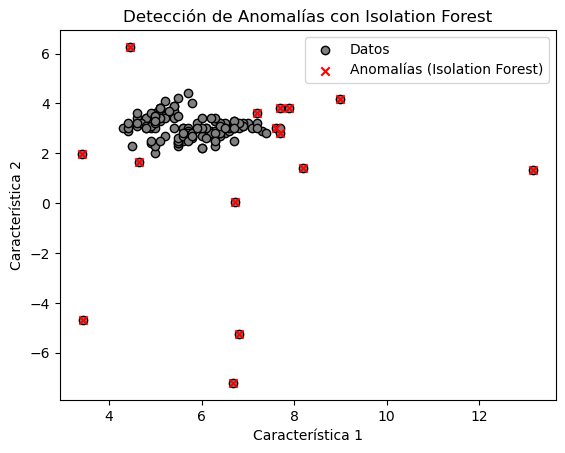

In [6]:
#Visualizar Resultados de Isolation Forest:
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolors='k', label='Datos')
plt.scatter(anomalies_isolation_forest[:, 0], anomalies_isolation_forest[:, 1], c='r',
marker='x', label='Anomalías (Isolation Forest)')
plt.title('Detección de Anomalías con Isolation Forest')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

In [7]:
#Aplicar One-Class SVM:

one_class_svm_model = OneClassSVM(nu=0.1)
one_class_svm_model.fit(X)
one_class_svm_preds = one_class_svm_model.predict(X)
anomalies_one_class_svm = X[one_class_svm_preds == -1, :]

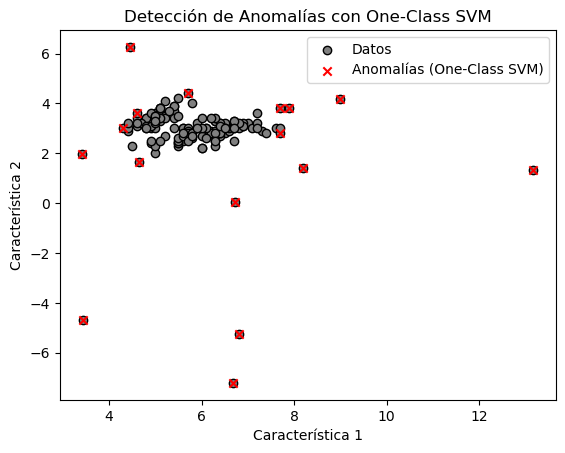

In [8]:
#Visualizar Resultados de One-Class SVM:
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolors='k', label='Datos')
plt.scatter(anomalies_one_class_svm[:, 0], anomalies_one_class_svm[:, 1],
c='r', marker='x', label='Anomalías (One-Class SVM)')
plt.title('Detección de Anomalías con One-Class SVM')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()